# Assignment 03: Regression, Learning Curves and Regularization

**Due Date:** Friday 10/13/2023(by 5pm)


**Please fill these in before submitting, just in case I accidentally mix up file names while grading**:

Name: Anas Mohammad

CWID-5: 22515

## Introduction 

In this exercise we will be using what you have learned about linear regression, polynomial regression and
regularization, to explore an artificial dataset.

I have generated a secret dataset.  The dataset uses a polynomial combination of a single parameter.
The unknown function is no less than degree 3, but no more than a degree 15 polynomial.  And some random
noise has also been added into the function, so that fitting it is not a completely trivial or obvious
exercise.  Since the dataset is generated from a polynomial function, the output labels `y` are
real valued numbers.  And thus you will be performing a regression fitting task in this assignment.

Your task, should you choose to accept it, is to load and explore the data from this function.  Your ultimate
goal is to try your best to determine the degree of the polynomial used, and the values of the parameters
then used in the secret function.  Because of the noise added to the data you are given, you will not be able
to exactly recover the parameters used to generate the artificial data.  You will even find that determining the
exact degree of the generating polynomial function is not possible.  How you apply polynomial fitting and 
regularization techniques can give different and better or worse approximations of the true underlying function.

In the below cells, I give instructions for the tasks you should attempt.  You will need to load the data and
visualize it to begin with.  Then you will be asked to apply polynomial fitting and regularization in an attempt
to fit the data.  But ultimately, at the end, you will be asked to take what you have discovered, and try and
give your best answer for the polynomial degree and best fitted polynomial parameters for this unknown data set.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# By convention, we often just import the specific classes/functions
# from scikit-learn we will need to train a model and perform prediction.
# Here we include all of the classes and functions you should need for this
# assignment from the sklearn library, but there could be other methods you might
# want to try or would be useful to the way you approach the problem, so feel free
# to import others you might need or want to try
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

In [2]:
# notebook wide settings to make plots more readable and visually better to understand
np.set_printoptions(suppress=True)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.rc('figure', titlesize=18)
plt.rc('legend', fontsize=14)
plt.rcParams['figure.figsize'] = (12.0, 8.0) # default figure size if not specified in plot
plt.style.use('seaborn-v0_8-darkgrid')

## Part 1: Load Data, Explore and Visualize
------------

You have been given a set of 100 (artificial) data points in the file named `assg-03-data.csv` in our 
data subdirectory.  Start by loading this file into a pandas dataframe.  Explore the data a bit.
Use the `describe()` function to get a sense of the number of values (there should be `m=100` samples),
and their mean and variance.  There are 2 columns, where `x` is the feature, and `y` is the function
value.  Or in other words 'y' is the label we will use for the regression fitting task.  What is the range of
the `x` features?  What is the range of the `y` output label here?

Also plot a scatter plot of the data to get a sense of the function shape.  Does it appear linear
or nonlinear?

In [3]:
# load in data file from relative directory data up one level from this notebook
data = pd.read_csv('../data/assg-03-data.csv')
data

,x,y
0,0.690831,1.288755
1,-0.255880,1.369548
2,-0.274875,1.433557
3,0.363220,1.399673
4,0.506610,1.322169
...,...,...
95,-0.954977,0.742030
96,-0.046553,1.570603
97,-0.382344,1.352748
98,-0.478165,1.245151


In [4]:
# describe values and their ranges
data.describe()

,x,y
count,100.000000,100.000000
mean,-0.000177,1.334812
std,0.550105,0.195478
min,-0.997241,0.742030
25%,-0.391611,1.275889
50%,-0.044007,1.386453
75%,0.451887,1.457631
max,0.956541,1.690944


In [5]:
# extract numpy arrays  and do other things to prepare data for modeling
label = data.y.to_numpy().reshape(-1,1)
feature = data.x.to_numpy().reshape(-1,1)

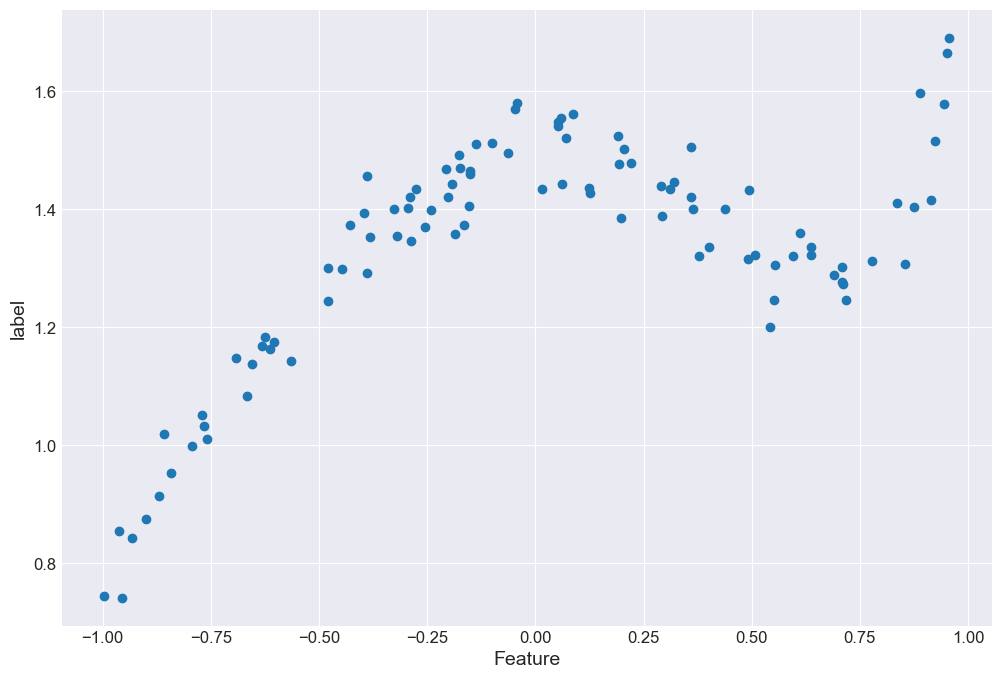

In [6]:
# visualize the data we loaded, make sure you use a scatter plot and provide labels where needed
plt.scatter (feature, label);
plt.xlabel("Feature");
plt.ylabel("label");

## Part 2: Create an Underfit Model

The degree of the secret function is more than 3, but probably less than 20 in this assignment.  Lets create a model
that should underfit the data.  You will create a degree 2 (quadratic) model.  Underfit a degree 2 polynomial regression to the
data.  In the next cell use `PolynomialFeatures` in a pipeline with scikit-learn `LinearRegression()` to create
a best (under)fit model of the data.  We will not be using any regularization just yet nor doing any train/test
split of the data, that will come later in this assignment.

In [7]:
# use a pipeline, this will first create the degree 2 polynomial features, then send the
# transformed data to a linear regression model using all default parameters
under_model = Pipeline([
    ('poly_features', PolynomialFeatures(degree=2, include_bias=False)),
    ('lin_regres', LinearRegression()),
])
under_model.fit(feature, label)

Pipeline(steps=[('poly_features', PolynomialFeatures(include_bias=False)),
                ('lin_regres', LinearRegression())])

In [8]:
#  fit model to degree 2 polynomial using your pipeline
model=under_model.fit(feature, label)

In the next cell, use introspection of your fitted (pipeline) model to display the intercept and fitted
coeffecients of the model.  Also determine the final RMSE and R^2 score of the fit.  Display them
in the next cell(s) for future reference and discussion.

You should get a single intercept parameter.  Since you are underfitting a degree 2 model here, you should
expect 2 coefficients, one for the $x^1$ original feature term, and another for the generated
$x^2$ square term for your model.

In [9]:
# you should report intercept, coefficients, R^2 and RMSE scores here
intercept=under_model['lin_regres'].intercept_
coefficients=under_model['lin_regres'].coef_
print("Intercept = ", intercept)
print("Coefficients = ", coefficients)
y_predict = model.predict(feature)
rmse = mean_squared_error(label, y_predict)
print("RMSE", rmse)
r2_ = under_model.score(feature, label)
print("R^2 fit",r2_)

Intercept =  [1.44703277]
Coefficients =  [[ 0.22449715 -0.37444861]]
RMSE 0.01108003538517672
R^2 fit 0.7071065883340324


In the next cell, the function to generate and plot learning curves for a polynomial
regression model has been given again.  This is basically identical to the example
for creating learning curves from your textbook and lecture notebooks.

In [10]:
def plot_learning_curves(model, X, y):
    """Plot learning curves obtained with training the given scikit-learn model
    with progressively larger amounts of the training data X.
    
    Nothing is returned explicitly from this function, but a plot will be created
    and the resulting learning curves displayed on the plot.
    
    Parameters
    ----------
    model - A scikit-learn estimator model to be trained and evaluated.
    X - The input training data
    y - The target labels for training
    """
    # we actually split out 20% of the data solely for validation, we train on the other 80%
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    
    # keep track of history of the training and validation cost / error function
    train_errors, val_errors = [], []
    
    # train on 1 to m of the data, up to all of the data in the split off training set
    for m in range (1, len(X_train)):
        # fit/train model on the first m samples of the data
        model.fit(X_train[:m], y_train[:m])
        
        # get model predictions
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        
        # determine RMSE errors and save history for plotting
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
        
    # plot the resulting learning curve
    plt.plot(np.sqrt(train_errors), 'r-', linewidth=2, label='train')
    plt.plot(np.sqrt(val_errors), 'b-', linewidth=2, label='val')
    plt.xlabel('Training set size')
    plt.ylabel('RMSE')
    plt.legend(fontsize=18)

Use this function to plot the learning curves for your underfit model on all of the
data you have.

1. You may want to limit the y axis a bit to better view the plot.
2. Before calling the function to plot the learning curves, set the NumPy random seed to 42.  If you do this
   you will always get the same train/validation split of data when the function is called.  If you do this you
   should see that performance converges for train and validation RMSE after using around only 10 data points or so.

(0.03, 0.14)

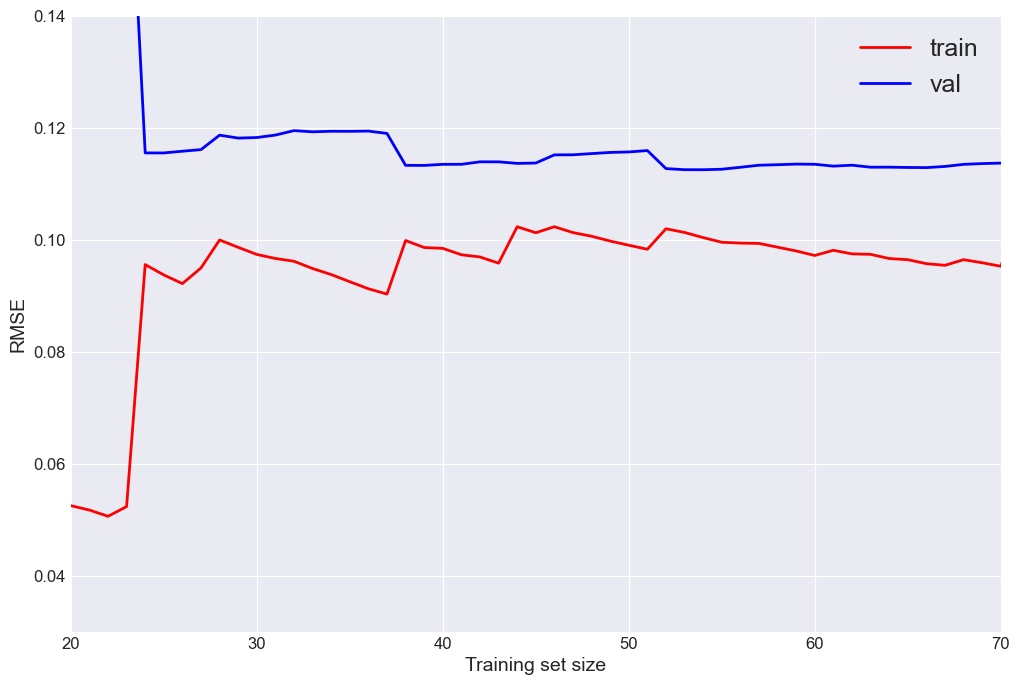

In [11]:
# always set random seed before calling/generating learning curves in this assignment
np.random.seed(42)

# generate learning curves for underfit model.  If needed limit y axis so can interpret learning curves
plot_learning_curves(under_model, feature, label)
plt.xlim(20,70)
plt.ylim(0.03,0.14)

You may want or need to limit the y axis to better view the learning curves.  You should see a
bit of a gap usually (because of random split in the learning curves function, results will
vary each time you run).  But usually with a training set size of 20 points or so you should find that
results converge.  Note the RMSE that you are getting on the training and validation data once they
converge on the underfit model.

Recall from our discussion in class, that the RMSE obtained on an underfit model does give you some information.
We would hope that if we can find a model with the right power, that the validation results will still converge
relatively quickly, but with better overall RMSE performance than the underfit model can obtain.

## Part 3: Create an Overfit Model

The next step when trying to determine what we can achieve with a type of ML model is to try and
overfit the data with a too powerful model.

Repeat the previous steps, but with a degree 100 polynomial.  This should be many times larger than the
actual degree of the polynomial used in the secret function for this assignment.

Do all of the previous steps again for a degree 100 model in the following cells.

1. Create a pipeline to generate degree 100 features for a default `LinearRegression` model.
2. Fit the model to all of the data.
3. Report the intercept and slope coefficients for the model.  There should be consideradbly more coefficients this
   time around for your overfit model.
4. Report $R^2$ and RMSE scores obtained by this overfit model.
5. Plot the learning curves of the overfit model.

In [12]:
# create pipeline for overfit model here
# use a pipeline, this will first create the degree 2 polynomial features, then send the
# transformed data to a linear regression model using all default parameters
overfit_model = Pipeline([
    ('poly_features', PolynomialFeatures(degree=100, include_bias=False)),
    ('lin_regres', LinearRegression()),
])
overfit_model.fit(feature, label)

Pipeline(steps=[('poly_features',
                 PolynomialFeatures(degree=100, include_bias=False)),
                ('lin_regres', LinearRegression())])

In [13]:
# generate polynomial features and fit the overfit model 
model=overfit_model.fit(feature, label)

In [14]:
# report intercept and slope coefficients for the overfit model
intercept=overfit_model['lin_regres'].intercept_
coefficients=overfit_model['lin_regres'].coef_
print("Intercept = ", intercept)
print("Coefficients = ", coefficients)


Intercept =  [1.45401496]
Coefficients =  [[ 6.79355207e-02  2.98824120e+01  3.16238450e+01 -4.11744365e+03
  -6.25008636e+03  2.31973238e+05  4.11179280e+05 -7.07735626e+06
  -1.36720572e+07  1.32031059e+08  2.69584139e+08 -1.61716002e+09
  -3.42983446e+09  1.35755822e+10  2.95816776e+10 -7.99574620e+10
  -1.77765502e+11  3.32501570e+11  7.51223546e+11 -9.62482790e+11
  -2.20709462e+12  1.84403851e+12  4.30424322e+12 -2.00449399e+12
  -4.83701244e+12  4.18593333e+11  1.32592173e+12  1.54365031e+12
   3.33772287e+12 -8.32748821e+11 -2.08980275e+12 -1.37376650e+12
  -2.94862603e+12  4.84134356e+11  1.34156160e+12  1.43196381e+12
   3.04619969e+12  3.10276636e+11  5.20321669e+11 -1.05205170e+12
  -2.39737995e+12 -1.10577560e+12 -2.37400507e+12 -8.02540595e+10
   6.30277663e+10  9.43728735e+11  2.21490686e+12  1.10988276e+12
   2.27635391e+12  3.37153934e+11  4.96865324e+11 -5.77266810e+11
  -1.45611605e+12 -1.08907920e+12 -2.32595147e+12 -8.05595707e+11
  -1.56771343e+12 -7.14550819e+10 

In [15]:
# report R^2 and RMSE performance of the overfit model on all of the data here
y_predict = model.predict(feature)
rmse = mean_squared_error(label, y_predict)
print("RMSE", rmse)
r2_ = overfit_model.score(feature, label)
print("R^2 fit",r2_)

RMSE 0.0017598909407029748
R^2 fit 0.953478446244664


(15.0, 80.0)

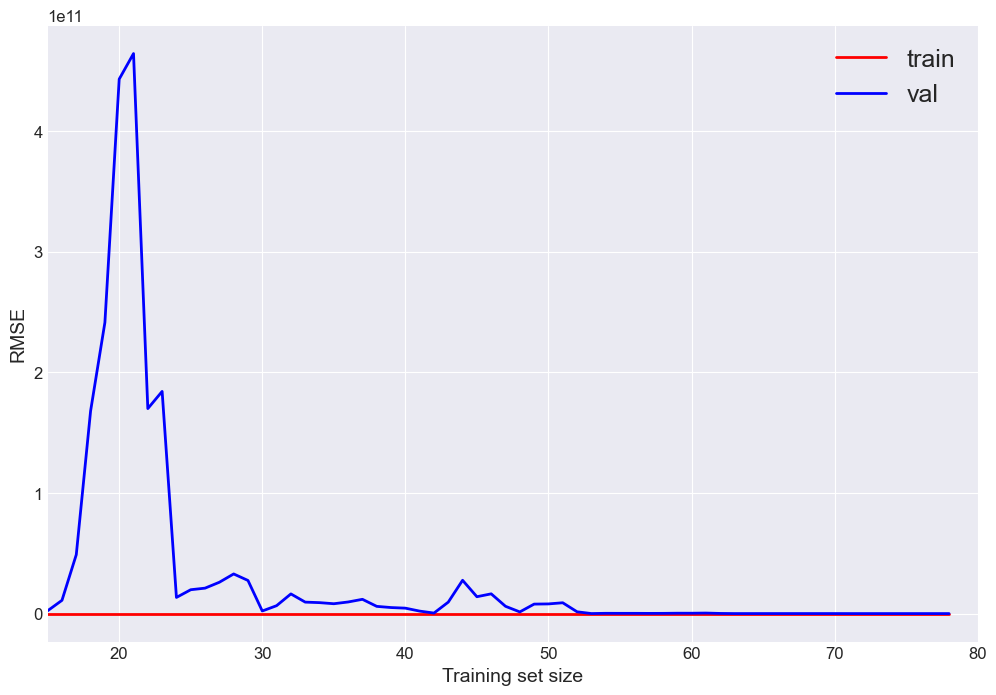

In [16]:
# finally generate the learning curves for the overfit model.  Set the
# random seed to 42 before plotting learning curves again.  And
# limit y axis if needed to be able to see where curves converge
np.random.seed(42)
plot_learning_curves(overfit_model, feature, label)
plt.xlim(15, 80)

## Part 4: Estimate True Function Degree using Lasso Regularization

The Lasso Regularization that we discussed in class (using absolute value for the regularization term,
also known as $\ell_1$ regularization), has the effect of driving unneeded parameters to 0.  So in our current
assignment, it can give us some insight into the true degree of the secret function polynomial used to
generate the data you were given.

In the following cell, use Lasso regularization on the degree 100 model again.  Try exploring values
of alpha used in your Lasso regularization model.  Your goal is to find a value of alpha
that will achieve an RMSE on your fitted model similar to the overfit model on the data it
was trained with.  You probably won't be able to get quite the same RMSE, but you should be able to
find values of `alpha` that are much better than the underfit model achieves.

Do all of the previous steps again for a Lasso regularization model in the following cells.

1. Create a pipeline to generate degree 100 features for a `Lasso` regression model.
2. Fit the Lasso regularized pipeline model to all of the data, exploring good values of `alpha` to use for the regularization.
3. Report the intercept and slope coefficients for the model. Note which parameters have been driven to 0 by the
   Lasso regularization.
5. Report $R^2$ and RMSE scores obtained by this Lasso regularized model.
6. Plot the learning curves of the Lasso regularized model.

In [17]:
# create pipeline for a lasso regularization model here for a degree 100 polynomial
# set of features, NOTE: you might want to increase max_iter to limit or remove 
# ConvergenceWarnings from the learning curves plot which will probably occur when very
# few data points are used to fit a model
lasso = Pipeline([
    ('poly_features', PolynomialFeatures(degree=100, include_bias=False)),
    ('lasso_regres', Lasso(alpha=0.01)),
])


In [18]:
# generate polynomial features and fit the lasso model with some value of alpha for regularization
model = lasso.fit(feature, label)

In [19]:
# report intercept and slope coefficients for the lasso regularization model
intercept=lasso['lasso_regres'].intercept_
coefficients=lasso['lasso_regres'].coef_
print("Intercept = ", intercept)
print("Coefficients = ", coefficients)

Intercept =  [1.40859892]
Coefficients =  [ 0.00262231 -0.2501225   0.31601064 -0.          0.         -0.
  0.         -0.          0.         -0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.         -0.
  0.         -0.          0.         -0.          0.         -0.
  0.         -0.          0.         -0.          0.         -0.
  0.         -0.          0.         -0.          0.         -0.
  0.         -0.          0.         -0.          0.         -0.
  0.         -0.          0.         -0.          0.         -0.
  0.         -0.          0.         -0.          0.         -0.
  0.         -0.          0.         -0.          0.         -0.
  0.         -0.          0.         -0.          0.         -0.
  0.         -0.          0.         -0.          0.         -0.
  0.         -0.          0.         -0.          0.         -0.
  0.         -0.          0.         -0.        

In [20]:
# report R^2 and RMSE performance of the lasso regularization model on all of the data here
y_predict_lasso = model.predict(feature)
rmse = mean_squared_error(label, y_predict_lasso)
print("RMSE", rmse)
r2_ = lasso.score(feature, label)
print("R^2 fit",r2_)

RMSE 0.007995559333495692
R^2 fit 0.7886426739667067


/Users/mdanas/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(


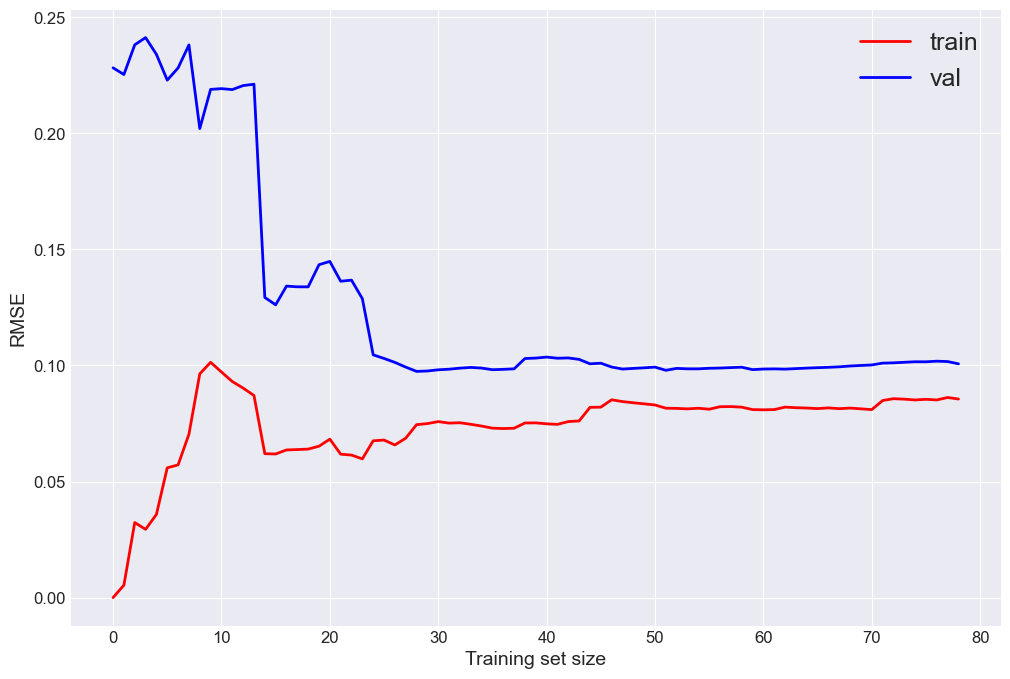

In [21]:
# finally generate the learning curves for the lasso regularization
# model.  Set the random seed to 42 before plotting learning curves
# again.  And limit y axis if needed to be able to see where curves
# converge.  You will probably get ConvergenceWarnings here, though you
# may want to and probably should increase the `max_iter` for you model
# to reduce these warnings.
np.random.seed(42)
plot_learning_curves(lasso, feature, label)

In [22]:
lasso_small = Pipeline([
    ('poly_features', PolynomialFeatures(degree=100, include_bias=False)),
    ('lasso_regres', Lasso(alpha=0.001)),
])


In [23]:
model_small = lasso_small.fit(feature, label)

In [24]:
intercept=lasso_small['lasso_regres'].intercept_
coefficients=lasso_small['lasso_regres'].coef_
print("Intercept = ", intercept)
print("Coefficients = ", coefficients)

Intercept =  [1.46633368]
Coefficients =  [ 0.04537497 -0.55697381  0.          0.          0.30871437  0.
  0.15064581  0.35632539  0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.         -0.          0.         -0.          0.         -0.
  0.         -0.          0.         -0.          0.         -0.
  0.         -0.          0.         -0.          0.         -0.
  0.         -0.          0.         -0.          0.         -0.
  0.         -0.          0.         -0.          0.         -0.
  0.         -0.          0.         -0.          0.         -0.
  0.         -0.          0.         -0.        

In [25]:
y_predict_lasso_small = model_small.predict(feature)
rmse = mean_squared_error(label, y_predict_lasso_small)
print("RMSE", rmse)
r2_ = lasso_small.score(feature, label)
print("R^2 fit",r2_)

RMSE 0.002932668897969054
R^2 fit 0.9224768361333957


/Users/mdanas/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(


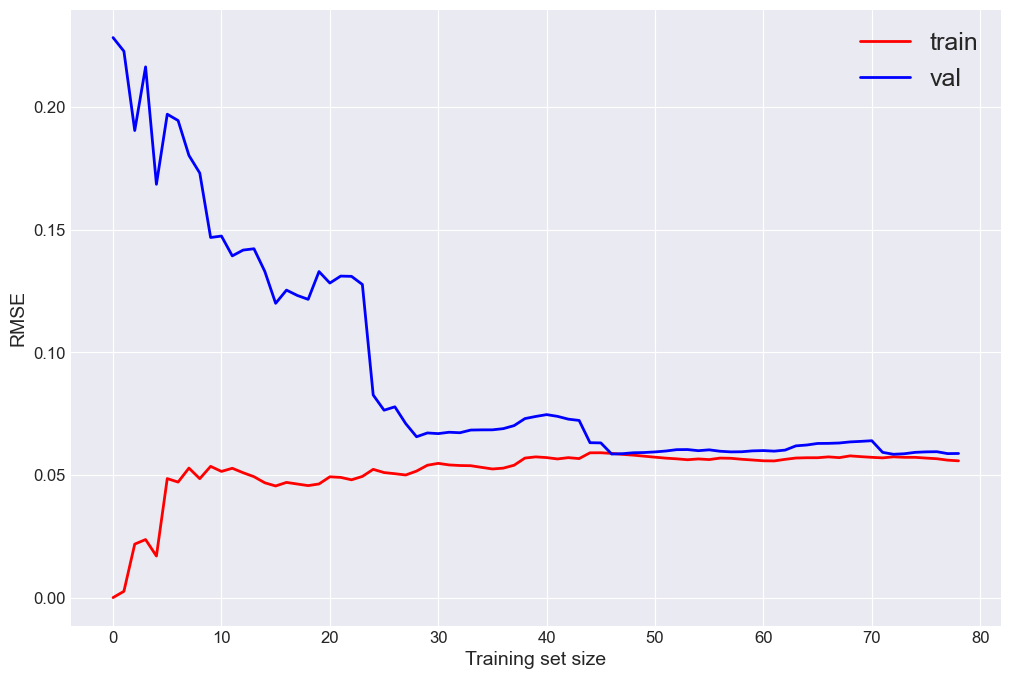

In [26]:
np.random.seed(42)
plot_learning_curves(lasso_small, feature, label)

You will know you are getting somewhere in the appropriate neighborhood for good
values of the `alpha` metaparameter when:

1. Your R^2 and RMSE scores are similar to the overfit model, and are certainly better than the underfit model.
2. The learning curves should "converge" again here, similar to the underfit model.  Probably sometime after using
   20 or 30 data points in the training set size.  But they should converge to an RMSE lower than that seen for
   the underfit model.

## Part 5: Use Ridge regularization

Try and at least match, if not improve upon, the best RMSE you can find from Lasso regularization using
Ridge regularization instead.  You should find that coefficients will not mostly be driven to 0's like
before for the Lasso regularization. But you may be more easily able to find an alpha that gets a slight improvement
and ends up with the learning curves converging and an RMSE getting close to the performance seen in an
overfit model.

Again perform all of the following for a Ridge regularization model, finding an appropriate value of the `alpha`
meta parameter:

1. Create a pipeline to generate degree 100 features for a `Ridge` regression model.
2. Fit the Ridge regularized model pipeline to all of the data, exploring good values of `alpha` to use for the regularization.
3. Report the intercept and slope coefficients for the model. Note that most parameters are not 0 for this type of regularization.
5. Report $R^2$ and RMSE scores obtained by this Ridge regularized model.
6. Plot the learning curves of the Ridge regularized model.

In [27]:
# create pipeline for a ridge regularization model here for a degree 100 polynomial
# set of features
ridge = Pipeline([
    ('poly_features', PolynomialFeatures(degree=100, include_bias=False)),
    ('ridge_regres', Ridge(alpha=0.01)),
])

In [28]:
# generate polynomial features and fit the lasso model with some value of alpha for regularization
model = ridge.fit(feature, label)

In [29]:
# report intercept and slope coefficients for the lasso regularization model
intercept=ridge['ridge_regres'].intercept_
coefficients=ridge['ridge_regres'].coef_
print("Intercept = ", intercept)
print("Coefficients = ", coefficients)

Intercept =  [1.49322974]
Coefficients =  [[ 0.05471119 -0.8596488   0.0329127   0.30932409  0.19273923  0.28648331
   0.11777806  0.16290926  0.05993866  0.05661831  0.03333915 -0.01654514
   0.02140939 -0.06092367  0.01461083 -0.0834784   0.00949206 -0.09019061
   0.00520791 -0.08579782  0.00171865 -0.0740286  -0.00088632 -0.05779586
  -0.0025784  -0.03932841 -0.00340921 -0.02027775 -0.00348465 -0.00181716
  -0.0029357   0.0152651  -0.00189681  0.03048123 -0.00049267  0.04357083
   0.0011687   0.05444009  0.00299843  0.06311298  0.00492666  0.06969304
   0.00690083  0.07433437  0.00888328  0.07721991  0.01084855  0.0785457
   0.01278075  0.07850971  0.01467127  0.07730429  0.01651666  0.07511111
   0.01831702  0.07209822  0.0200746   0.06841846  0.02179281  0.06420889
   0.02347546  0.05959094  0.02512623  0.05467104  0.02674834  0.04954154
   0.02834432  0.04428176  0.02991594  0.0389592   0.03146421  0.03363072
   0.03298941  0.02834368  0.03449116  0.02313706  0.03596854  0.018042

In [30]:
# report R^2 and RMSE performance of the lasso regularization model on all of the data here
y_predict_ridge = model.predict(feature)
rmse = mean_squared_error(label, y_predict_ridge)
print("RMSE", rmse)
r2_ = ridge.score(feature, label)
print("R^2 fit",r2_)

RMSE 0.0023596752483258485
R^2 fit 0.9376235445212999


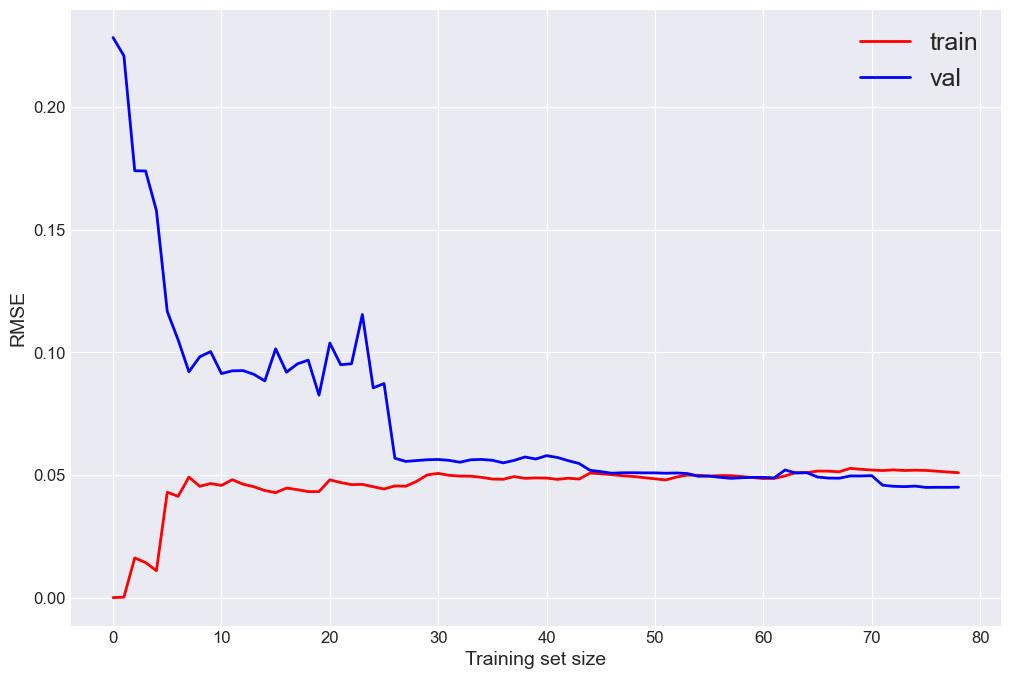

In [31]:
# finally generate the learning curves for the lasso regularization
# model.  Set the random seed to 42 before plotting learning curves
# again.  And limit y axis if needed to be able to see where curves
# converge
np.random.seed(42)
plot_learning_curves(model, feature, label)

In [32]:
ridge_01 = Pipeline([
    ('poly_features', PolynomialFeatures(degree=100, include_bias=False)),
    ('ridge_regres', Ridge(alpha=0.1)),
])

In [33]:
# generate polynomial features and fit the lasso model with some value of alpha for regularization
model_01 = ridge_01.fit(feature, label)

In [34]:
intercept=ridge_01['ridge_regres'].intercept_
coefficients=ridge_01['ridge_regres'].coef_
print("Intercept = ", intercept)
print("Coefficients = ", coefficients)

Intercept =  [1.47762192]
Coefficients =  [[ 0.04516334 -0.65796766  0.09469926  0.04148425  0.11234699  0.16205636
   0.08972174  0.14359829  0.06702882  0.09953472  0.04997596  0.05955049
   0.0375226   0.02968511  0.02831666  0.00942027  0.0214425  -0.00325086
   0.01630055 -0.01035403  0.01247148 -0.0135634   0.00964322 -0.01416305
   0.00757556 -0.01310024  0.00608168 -0.01105532  0.00501648 -0.00850544
   0.00426807 -0.00577664  0.00375097 -0.00308459  0.00340056 -0.00056537
   0.00316853  0.00170132  0.00301924  0.00367518  0.00292678  0.00534279
   0.00287263  0.00670856  0.00284382  0.00778826  0.00283152  0.00860439
   0.00282991  0.00918293  0.00283534  0.00955119  0.00284567  0.00973625
   0.00285976  0.00976405  0.00287716  0.00965882  0.00289783  0.0094427
   0.00292191  0.00913567  0.00294966  0.0087555   0.00298131  0.00831785
   0.00301706  0.00783636  0.00305701  0.00732282  0.00310119  0.00678734
   0.00314951  0.00623849  0.00320181  0.0056835   0.00325781  0.005128

In [35]:
y_predict_ridge_01 = model.predict(feature)
rmse = mean_squared_error(label, y_predict_ridge_01)
print("RMSE", rmse)
r2_ = ridge_01.score(feature, label)
print("R^2 fit",r2_)


RMSE 0.0024580745745258754
R^2 fit 0.9319314753351079


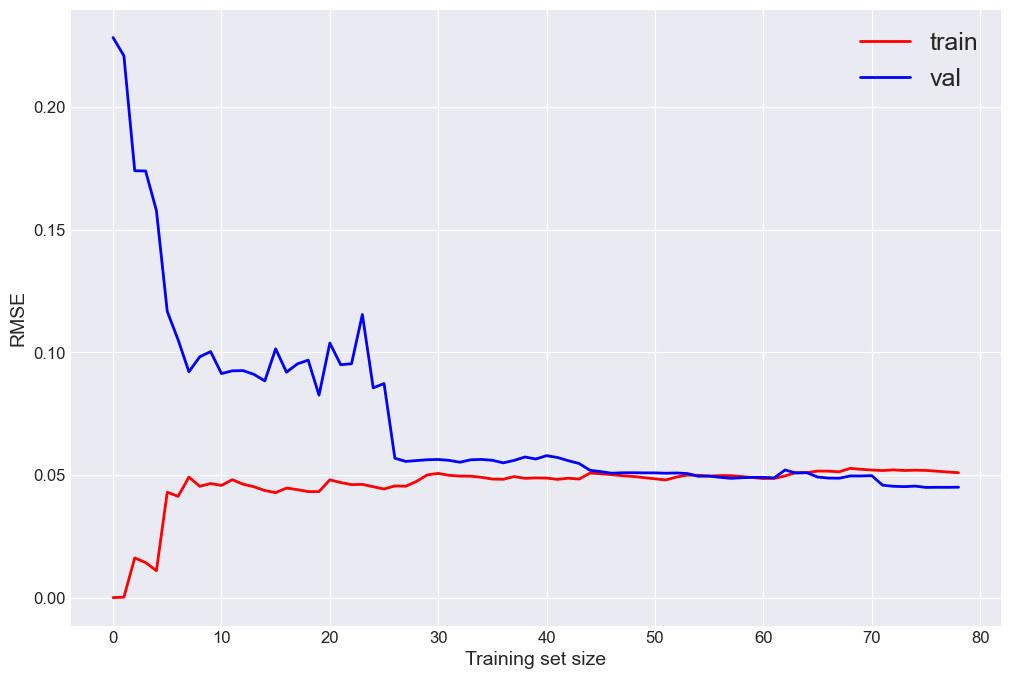

In [36]:
np.random.seed(42)
plot_learning_curves(model, feature, label)

In [ ]:
ridge_02 = Pipeline([
    ('poly_features', PolynomialFeatures(degree=100, include_bias=False)),
    ('ridge_regres', Ridge(alpha=10)),
])

In [ ]:
model_02 = ridge_02.fit(feature, label)

In [ ]:
intercept=ridge_02['ridge_regres'].intercept_
coefficients=ridge_02['ridge_regres'].coef_
print("Intercept = ", intercept)
print("Coefficients = ", coefficients)

In [ ]:
y_predict_ridge_02 = model_02.predict(feature)
rmse = mean_squared_error(label, y_predict_ridge_02)
print("RMSE", rmse)
r2_ = ridge_02.score(feature, label)
print("R^2 fit",r2_)

In [ ]:
np.random.seed(42)
plot_learning_curves(model_02, feature, label)

## Part 6: Summary and Discussion of Findings

Fill out the following table with the values you obtain in your work on the assignment.

| Model    | `alpha` | $R^2$  | RMSE   |
|----------|---------|--------|--------|
| underfit | none    | 0.7071 | 0.0110 | 
| overfit  | none    | 0.9534 | 0.0017 |
| Lasso    | 0.01    | 0.7886 | 0.0079 |
| Lasso    | 0.001   | 0.9224 | 0.0029 |
| Ridge    | 0.01    | 0.0937 | 0.0023 |
| Ridge    | 0.1     | 0.9319 | 0.0024 |
| Ridge    | 10      | 0.7644 | 0.0089 |



For some extra consideration, a good student might show multiple results of regularizing using Lasso and/or Ridge, to show
which values of `alpha` were tried and the resulting fit measurements.

Discuss your observations here about your models.  Observe the Lasso coefficients that your model finds and comment
about the degree of the secret polynomial function.  Record other observations you may have had about good values of
`alpha` for your regularization attempts.

### Discussion
Underfit model has a bigger RMSE compared to the overfit, so it is not good than overfit. Lesser the RMSE, better the model would be. For the underfit model the result is converging after 20 data points.

In overfit model we have more coefficients as it is a powerful model with degree 100 polynomial. For Lasso we have taken two different values of alpha, out of which alpha with 0.001 performed well as it has better R^2 fit and less RMSE to that of Lasso with alpha 0.001.

For Ridge we have taken three different values of alpha, by adding the right amount of regularization, that is alpha=0.1 we get the fitted curve that converges  with good R^2 fit and less RMSE compared to the other two alpha values and it also has RMSE closed to the overfit model.


## Part 7: More Systematic Grid Meta-Parameter Search

While it is possible (and useful) to get a feel for what meta-parameter values you need to obtain
good results from regularization and different models, at times we need to be more systematic.

You have seen some examples of using the Scikit-learn grid search to more systematically
explore model meta parameters.  The following is a tutorial specifically for beginners
on using [scikit-learn GridSearchCV for Beginners](https://towardsdatascience.com/gridsearchcv-for-beginners-db48a90114ee)
that you might find helpeful to look at as well when doing this section.

In the following, perform a more systematic grid search of the alpha parameter for a Lasso
regression using a degree 100 polynomial as input.  Report the RMSE performance of
the best model you find.  Make sure you search a fairly good range of `alpha` parameters.
Also report the intercept and coefficients of the model.

Did the best model have a similar `alpha` value that you got trying to tune it by hand?  Do the
parameters that were driven to 0 look similar or different from the value of `alpha` you found
previously?  For extra consideration, create a plot to visualize the RMSE performance for the range of
`alpha` values that you explored in the grid search.

In [ ]:
# create grid search of Lasso/l1 over alpha parameter space
grid_lasso = Pipeline([
    ('poly_features', PolynomialFeatures(degree=100, include_bias=False)),
    ('lass_regres', Lasso()),
])
parameters = {'lass_regres__alpha':[0.0001,0.001,0.01,0.1]}
grid_search = GridSearchCV(grid_lasso, param_grid = parameters)


In [ ]:
# fit the model to perform the grid search
fit_lasso = grid_search.fit(feature, label)

In [ ]:
# display the best parameter we found
grid_search.best_params_

In [ ]:
# report intercept and slope coefficients for the lasso regularization model
print("Intercept:", grid_search.best_estimator_['lass_regres'].intercept_)
print("Coefficients:", grid_search.best_estimator_['lass_regres'].coef_)

In [ ]:
# report R^2 and RMSE performance of the lasso regularization model on all of the data here

print("RMSE", np.sqrt(fit_lasso.best_score_))
r2_ = fit_lasso.score(feature, label)
print("R^2 fit",r2_)


As a final activity for this assignment, below you have been given an example of a setup for a
`GridSearchCV` that will instead search all polynomial degrees from 2 to 100.  Modify the following 
code if necessary to run in your assignment (may need to change name of input `x` or output `y` or
other minor tweaks?)  Observe the polynomial degree obtained by this grid search on the data.  Does
that surprise your, or look resonable to some of the estimates you have made about the secret
function?

In [ ]:
# a helper function.  This returns a fit/transformer pipeline, as GridSearchCV expects
# but we can call it to generate pipelines with different degree polynomials
def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree, include_bias=False), LinearRegression(**kwargs))

# we set up grid search on single degree meta-parameter of the PolynomialFeatures part of the pipeline
# the result is that degrees from 1 to 100 are tried for PolynomialFeatures here
degrees = np.arange(2, 100)
parameters = {'polynomialfeatures__degree': degrees}

# the grid search over the polynomial degrees on standard Linear Regression
poly_gridcv = GridSearchCV(PolynomialRegression(), parameters, scoring='neg_mean_squared_error', cv = 5)

In [ ]:
# fit the model to perform the grid search
poly_gridcv.fit(feature, label)

# display the best parameter we found
print('Grid search best alpha parameter:', poly_gridcv.best_params_)
print('Grid search best MSE: ', poly_gridcv.best_score_)
print('Grid search best RMSE: ', np.sqrt(-poly_gridcv.best_score_))

In [ ]:
# report intercept and slope coefficients for the lasso regularization model
print('Intercept   : ', poly_gridcv.best_estimator_['linearregression'].intercept_)
print('Coefficients: ', poly_gridcv.best_estimator_['linearregression'].coef_)